# Practical Linear Algebra for Data Science
## Mike X Cohen (sincxpress.com)
### https://www.oreilly.com/library/view/practical-linear-algebra/9781098120603/

#### Code for chapter 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz


# NOTE: these lines define global figure properties used for publication.
from IPython import display
display.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

/var/folders/8_/1s5ps_mn2158pygkkqf7rh440000gn/T/ipykernel_35634/1647904893.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # print figures in svg format


# Column space

In [ ]:
# some matrix (just one lonely little column)
A  = np.array([ [1],[3] ])


# The column space contains an infinite number of points, but for computational convenience,
# we can draw the line using only two points
xlim = [-5,5]
colspace_p1 = xlim[0]*A
colspace_p2 = xlim[1]*A

plt.figure(figsize=(6,6))

plt.plot([0,A[0,0]],[0,A[1,0]],'k',linewidth=4,label='A')
plt.plot([colspace_p1[0,0],colspace_p2[0,0]],[colspace_p1[1,0],colspace_p2[1,0]],
         '--',linewidth=3,color=[.7,.7,.7],label='C(A)')
plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.grid()
plt.savefig('Figure_06_01.png',dpi=300)
plt.show()

In [ ]:
# some matrix
A1  = np.array([ [1,1],[3,2] ])
A2  = np.array([ [1,2],[3,6] ])



# some other plotting specifications
xlim = [-6,6]
color = [ [0,0,0],[.7,.7,.7] ]


# make the plot
_,axs = plt.subplots(1,2,figsize=(12,6))

# loop over columns
for i in range(2):
  axs[0].plot([0,A1[0,i]],[0,A1[1,i]],color=color[i],linewidth=4)
  axs[1].plot([0,A2[0,i]],[0,A2[1,i]],color=color[i],linewidth=4,zorder=-i)
  
  # set some axis properties
  axs[i].set_xlim(xlim)
  axs[i].set_ylim(xlim)
  axs[i].grid()
  axs[i].text(xlim[0]-.7,xlim[1]+.5,f'{"AB"[i]})',fontweight='bold',fontsize=16)

# set the legends and subplot letters
for i in [0,1]: axs[i].legend([f'A{i+1}$_{{[:,0]}}$',f'A{i+1}$_{{[:,1]}}$'])

plt.savefig('Figure_06_02.png',dpi=300)
plt.show()

# Now for R3

In [ ]:
# a matrix with two columns in R3
A = np.array( [ [3,0],
                [5,2],
                [1,2] ] )


# create a 3D graph
ax = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')

# draw plane corresponding to the column space
xx, yy = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2]
ax.plot_surface(xx,yy,z1,alpha=.2)


## plot the two vectors from matrix S
ax.plot([0, A[0,0]],[0, A[1,0]],[0, A[2,0]],color=color[0],linewidth=4)
ax.plot([0, A[0,1]],[0, A[1,1]],[0, A[2,1]],color=color[1],linewidth=4)

plt.savefig('Figure_06_03.png',dpi=300)
plt.show()

# Null spaces

In [ ]:
# The two matrices
A = np.array([ [1,-1],[-2,2] ])
B = np.array([ [1,-1],[-2,3] ])

# null spaces
print( scipy.linalg.null_space(A) )
print(' ')

print( scipy.linalg.null_space(B) )

In [ ]:
# Using matrix A above

nullvect = scipy.linalg.null_space(A)



# some other plotting specifications
xlim = [-3,3]
color = [ [0,0,0],[.7,.7,.7] ]


# make the plot
plt.figure(figsize=(6,6))

# plot the rows
for i in range(2):
  plt.plot([0,A[i,0]],[0,A[i,1]],color=color[i],linewidth=4,label='A$_{{[%g,:]}}$'%i)

# plot the nullspace vector
plt.plot([0,nullvect[0,0]],[0,nullvect[1,0]],'--',color=[.4,.4,.4],
         linewidth=4,label='y')

# plot the rest of the nullspace
plt.plot([xlim[0]*nullvect[0,0],xlim[1]*nullvect[0,0]],
         [xlim[0]*nullvect[1,0],xlim[1]*nullvect[1,0]],
         ':',color=[.4,.4,.4],label='N(A)')

# set some axis properties
plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.legend()

plt.savefig('Figure_06_04.png',dpi=300)
plt.show()

# Exercise 1

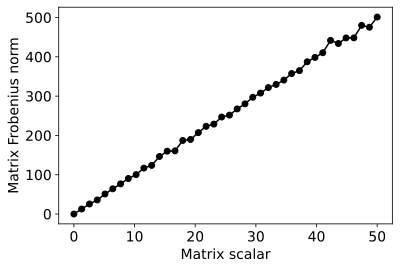

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
# experiment simulations
scalingVals = np.linspace(0,50,40) # range of scaling parameters (0 to 50 in 40 steps)
nExperiments = 10


# initialize output
matrixNorms = np.zeros((len(scalingVals),nExperiments))

# run experiment!
for si in range(len(scalingVals)):
  for expi in range(nExperiments):

    # generate a random scaled matrix
    R = np.random.randn(10,10) * scalingVals[si]

    # store its norm
    matrixNorms[si,expi] = np.linalg.norm(R,'fro')


# plot the results!
plt.plot(scalingVals,np.mean(matrixNorms,axis=1),'ko-')
plt.xlabel('Matrix scalar')
plt.ylabel('Matrix Frobenius norm')
plt.savefig('Figure_06_07.png',dpi=300)
plt.show()

# check that norm=0 for zeros matrix
print(matrixNorms[0,:])

# Exercies 2

In [3]:
# Function to compute Euclidean distance

def EuclideanDistance(M1,M2):
  
  # matrix difference
  D = M1-M2

  # matrix distance
  return np.sqrt(np.sum(D**2))

In [4]:
# optimization code

# create two matrices
N = 7
A = np.random.randn(N,N)
B = np.random.randn(N,N)

# optimization
numIters = 0
s = 1
while EuclideanDistance(s*A,s*B)>1:
  s *= .9
  numIters += 1

# report the results. Note that my loop code scales once more after criteria is reached,
# so I subtract one from numIters and undo the final s scaling.
print(f'Number of iterations: {numIters-1}')
print(f'Final value of scalar: {s/.9:.3f}')
print(f'Final Euclidean distance: {EuclideanDistance(s/.9*A,s/.9*B):.3f}')

Number of iterations: 21
Final value of scalar: 0.109
Final Euclidean distance: 1.019


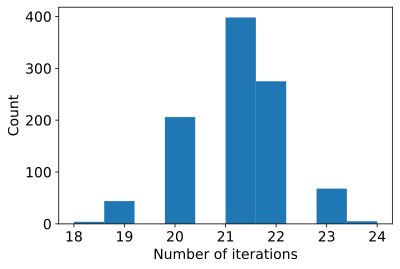

In [5]:
# The code below isn't part of the exercise, but I was curious to repeat the optimization
# 1000 times to see the distribution of numIters

nIters = np.zeros(1000)

for i in range(1000):
  # create two matrices
  A = np.random.randn(N,N)
  B = np.random.randn(N,N)

  numIters,s = 0,1
  while EuclideanDistance(s*A,s*B)>1:
    s *= .9
    numIters += 1
  nIters[i] = numIters-1

plt.hist(nIters)
plt.xlabel('Number of iterations')
plt.ylabel('Count');

# Exercise 3

In [6]:
# Create a matrix
M = 50
A = np.random.randn(M,M)

# trace method
norm1 = np.sqrt(np.sum(np.diag(A.T@A)))

# Euclidean norm method
norm2 = np.sqrt(np.sum(A**2))

# if they're equal, their difference should be (very close to) zero
norm1-norm2

0.0

# Exercise 4

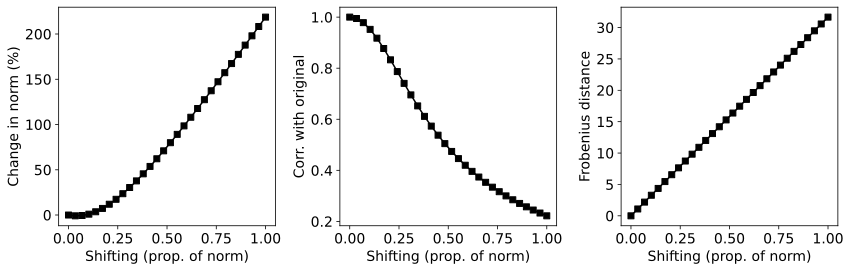

In [7]:
# size of the matrix
N = 10

shifting = np.linspace(0,1,30)

# original matrix
A = np.random.randn(N,N)
normA = np.linalg.norm(A,'fro')

# initialize results matrices
shiftingResults = np.zeros( (len(shifting),3) )
resultsNames = [ 'Change in norm (%)','Corr. with original','Frobenius distance' ]



for si in range(len(shifting)):

  # shift the matrix
  As = A + shifting[si]*normA*np.eye(N)

  # get the new norm and transform to %-change
  normShift = np.linalg.norm(As,'fro')
  shiftingResults[si,0] = 100 * (normShift-normA)/normA

  # compute correlation
  shiftingResults[si,1] = np.corrcoef(A.flatten(),As.flatten())[0,1]

  # Frobenius distance
  shiftingResults[si,2] = EuclideanDistance(A,As)




## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

  # plot the results
  axs[i].plot(shifting,shiftingResults[:,i],'ks-')
  axs[i].set_xlabel('Shifting (prop. of norm)')
  axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.savefig('Figure_06_06.png',dpi=300)
plt.show()

# Exercise 5

In [11]:
# Make a matrix with specified size and rank

M = 5
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r,N)

print(A.shape)
print(np.linalg.matrix_rank(A))

(5, 8)
5


# Exercise 6

In [12]:
# summed matrix has rank-0

A = np.diag([ 1,0,0,0,0])
B = np.diag([-1,0,0,0,0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 0)

In [13]:
# summed matrix has rank-1

A = np.diag([1,0,0,0,0])
B = np.zeros(A.shape)
B[0,1] = 10
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 1)

In [14]:
# summed matrix has rank-2

A = np.diag([1,0,0,0,0])
B = np.diag([0,1,0,0,0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 2)

In [15]:
# random matrices have maximum possible rank!
A = np.random.randn(5,1) @ np.random.randn(1,5)
B = np.random.randn(5,1) @ np.random.randn(1,5)
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 2)

# Exercise 7

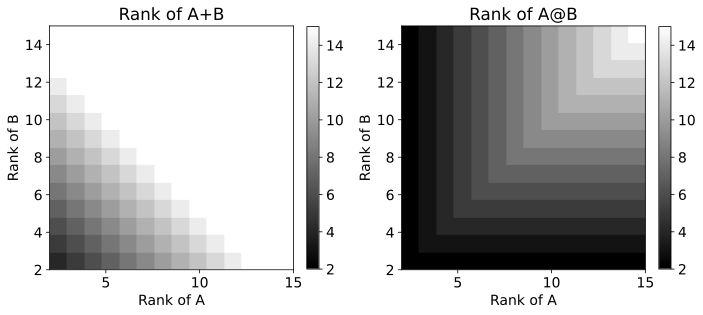

In [16]:
# The function
def makeAmatrix(M,r):
  return np.random.randn(M,r) @ np.random.randn(r,M)


# parameters
matSize = 20 # matrix size (square)
rs = range(2,16) # range of ranks

# initialize results matrix
Ranks = np.zeros((len(rs),len(rs),2))

# run the simulation
for i in range(len(rs)):
  for j in range(len(rs)):

    # create the matrices
    S = makeAmatrix(matSize,rs[i]) + makeAmatrix(matSize,rs[j])
    M = makeAmatrix(matSize,rs[i]) @ makeAmatrix(matSize,rs[j])
    
    # compute their ranks
    Ranks[i,j,0] = np.linalg.matrix_rank(S)
    Ranks[i,j,1] = np.linalg.matrix_rank(M)



## visualization
fig,axs = plt.subplots(1,2,figsize=(10,6))
s = '+@' # symbols for title

for i in range(2):

  # draw heatmat
  h = axs[i].imshow(Ranks[:,:,i],vmin=np.min(rs),vmax=np.max(rs),origin='lower',
                    extent=(rs[0],rs[-1],rs[0],rs[-1]),cmap='gray')
  
  # add colorbar and other niceties
  fig.colorbar(h,ax=axs[i],fraction=.045)
  axs[i].set_xlabel('Rank of A')
  axs[i].set_ylabel('Rank of B')
  axs[i].set_title(f'Rank of A{s[i]}B')


plt.savefig('Figure_06_09.png',dpi=300)
plt.tight_layout()
plt.show()

# Exercise 8

In [17]:
# matrix sizes and rank
M = 15
N = 8
r = 4

# compute the four matrices
A   = np.random.randn(M,r) @ np.random.randn(r,N)
At  = A.T
AtA = A.T@A
AAt = A@A.T

# print their ranks
print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

4 4 4 4


# Exercise 9

In [18]:
# function to run algorithm
def is_V_inColA(A,v):

  # check sizes
  if A.shape[0]!=v.shape[0]:
    raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

  # compute ranks
  rankA  = np.linalg.matrix_rank(A)
  rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

  # function outputs TRUE if v \in C(A)
  return rankA==rankAv


# create matrix and vector
A = np.random.randn(4,3)
v = np.random.randn(4,1)

# test!
is_V_inColA(A,v)

False

# Exercise 10

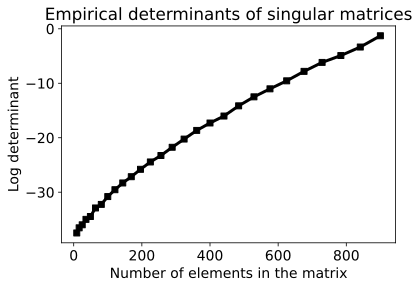

In [19]:
# matrix sizes
ns = np.arange(3,31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns),iters))

# loop over matrix sizes
for ni in range(len(ns)):
  for i in range(iters):
      
    # step 1
    A = np.random.randn(ns[ni],ns[ni])
    
    # step 2
    A[:,0] = A[:,1]
    
    # step 3
    dets[ni,i]=np.abs(np.linalg.det(A))
        

# note: the number of elements in a square matrix is the columns squared


# plotting
plt.figure(figsize=(6,4))
plt.plot(ns**2,np.log(np.mean(dets,axis=1)),'ks-',linewidth=3)
plt.xlabel('Number of elements in the matrix')
plt.ylabel('Log determinant')
plt.title('Empirical determinants of singular matrices')
plt.savefig('Figure_06_10.png',dpi=300)
plt.show()